In [34]:
from scipy.fftpack import fft, fftfreq
from scipy.signal import butter, lfilter,filtfilt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from numpy.lib.stride_tricks import sliding_window_view

In [2]:
def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    #l = lfilter(b, a, data)
    y = filtfilt(b, a, data)
    return y

In [37]:
def fourier(y):
    N = len(y)
    fps = fs

    yf = fft(y)
    xf = fftfreq(N, 1 / fps)

    return xf[1:], np.abs(yf[1:])

In [38]:
def plot_profile(df):
    px_1 = df['orig'].to_numpy()

    
    y = butter_bandpass_filter(px_1, lowcut, highcut, fs, order)
    
    nfft=128

 
    fig, axs = plt.subplots(4, 1)
    axs[0].plot(px_1)
    axs[0].set_title('Original')
    
    axs[1].plot(y)
    axs[1].set_title('Bandpassed')
    
    axs[2].specgram(y,NFFT = nfft, Fs=fs, noverlap=120, cmap='viridis', mode='psd')
    axs[2].set_title('PSD Spectrogram')
    axs[2].axis(ymin=0,ymax=3)
    x,y = fourier(y)
    axs[3].plot(x,y)
    axs[3].set_title('fft l1')
    


In [5]:
df_b4 = pd.read_pickle("before.pkl")
df_after = pd.read_pickle("after.pkl")


<IPython.core.display.Javascript object>


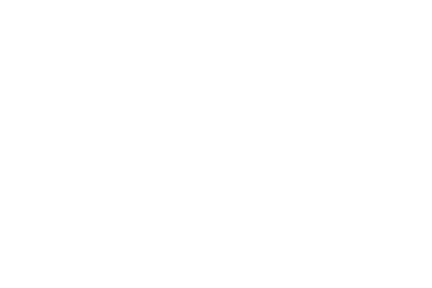

<IPython.core.display.Javascript object>


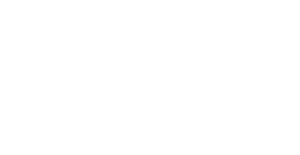

In [39]:
# Sample rate and desired cutoff frequencies (in Hz).
%matplotlib notebook
fs = 5.28
lowcut = 0.5
highcut = 1.8
order = 4
plot_profile(df_b4)

<IPython.core.display.Javascript object>


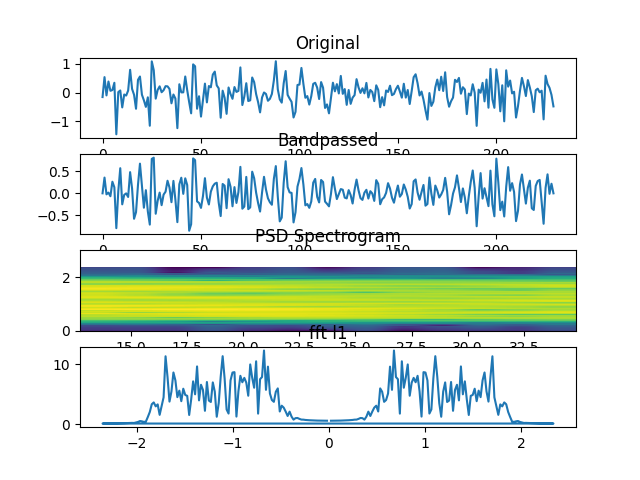

In [7]:
fs = 4.71
lowcut = 0.5
highcut = 1.8
order = 4

plot_profile(df_after)


In [79]:
px_1 = df_b4['orig'].to_numpy()
b4 = butter_bandpass_filter(px_1, lowcut, highcut, 5.28, order)
b4_slide = sliding_window_view(b4,50)

px_2 = df_after['orig'].to_numpy()
after = butter_bandpass_filter(px_2, lowcut, highcut, 4.71, order)
after_slide = sliding_window_view(after,50)
     

In [80]:
%matplotlib inline
for i in range(min(len(b4_slide),len(after_slide))):
    fs = 5.28
    xb,yb = fourier(b4_slide[i])
    fs = 4.71
    xa,ya = fourier(after_slide[i])
    plt.plot(xb,yb,'k')
    plt.plot(xa,ya,'r')
    plt.savefig('fft/'+str(i)+'.png')
    plt.close()


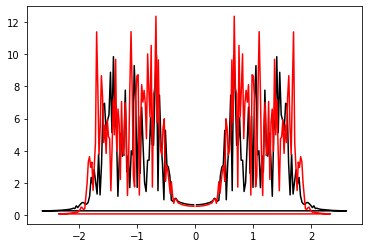

In [78]:
%matplotlib inline
fs = 5.28
xb,yb = fourier(b4)
fs = 4.71
xa,ya = fourier(after)
plt.plot(xb,yb,'k')
plt.plot(xa,ya,'r')

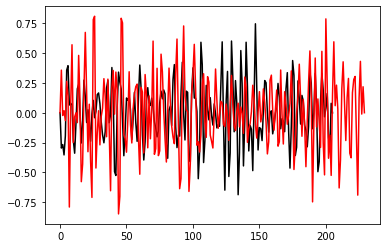

In [42]:
plt.plot(b4,'k')
plt.plot(after,'r')

In [32]:
v = 

In [43]:
len(v)

197